 # AST 208 Lab 7: Photometry 

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i>

**Your Name:** Cesarine Graham  
**Date:** 03/23/2023  
**Team Name:** asdf 
\
**Collaborators:** Alec Deen, Siddak Marwaha, Andy Fondaw

In [1]:
# Run this cell first to load the numpy and matplotlib.pyplot modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# load the fits module
from astropy.io import fits

# Your Transiting Planet

The observations you are using today come from the Kutztown University Observatory by Prof. Phill Reed on a known exoplanet "KELT-21b". Using the <a href="https://exoplanetarchive.ipac.caltech.edu/"> NASA Exoplanet Archive </a> look up KELT-21b. **IF your group number is even use the Calibrated_V images. If your number is odd use the Calibrated_I images.***


<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i> What group number are you and which dataset are you using?

<span style="color:dodgerblue"> We are group 3/4. Alec and I are doing the V dataset, and Siddak and Andy are doing the I dataset.

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i> 1) What kind of planet is this? What does "KELT" stand for? Compare this system to the Solar System.

(<span style="color:red">3 points</span>)

<span style="color:dodgerblue"> This is an exoplanet. KELT stands for Kilodegree Extremely Little Telescope.

<i class="fa fa-image" style="font-size:1.5em; color:red"></i> 2) What is its peak count value in your region? Embed a screenshot of your DS9 image (showing the full frame) with a region around KELT-21. 

 (<span style="color:red">3 points</span>)


<span style="color:dodgerblue"> The peak count is 14252 counts.

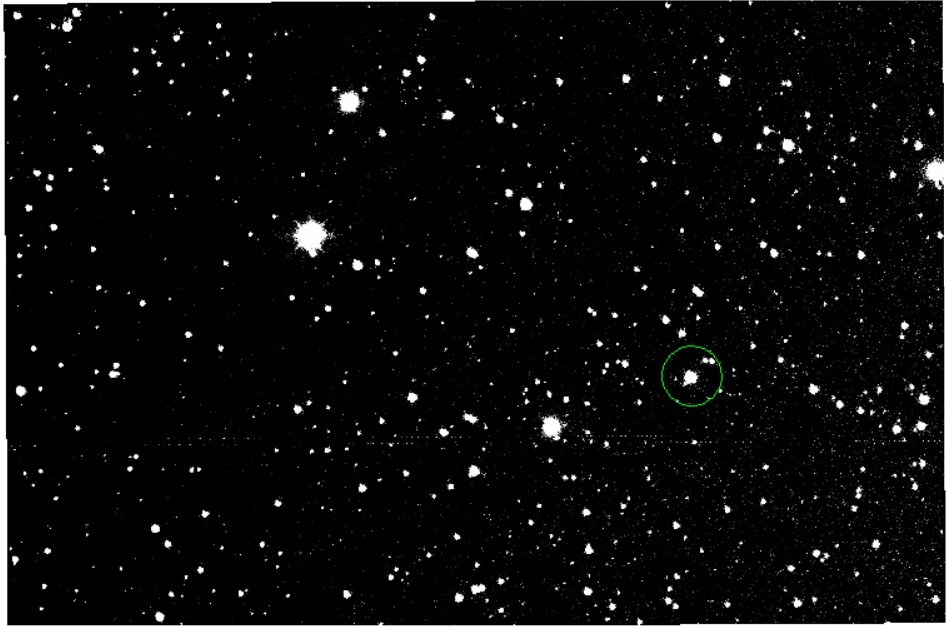

## Measure your image's Point Spread Function (PSF)

<i class="fa fa-image" style="font-size:1.5em; color:red"></i> 3) Include a plot of your cut across the star here (pixel counts as a function of position along the green line). You can embed the plot from DS9 or export the `Projection` data from DS9 and plot it here in Python.

<span style="color:red">(1 points total)</span>

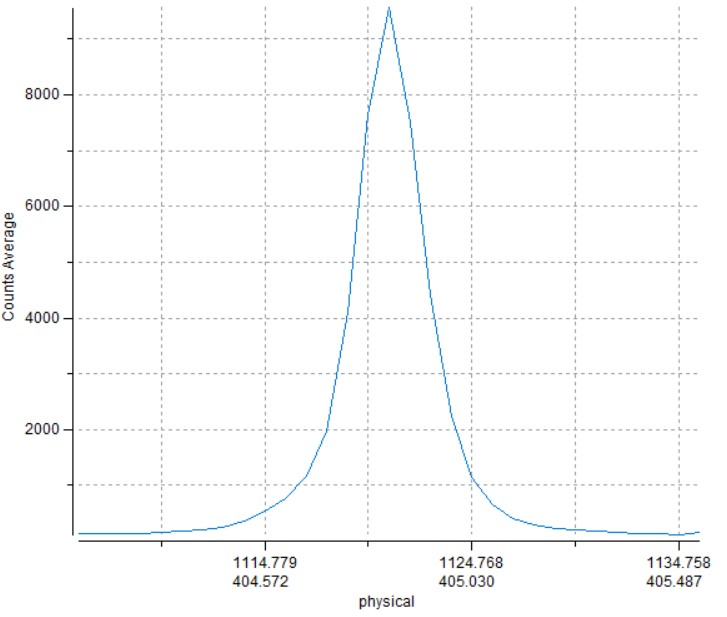

 <i class="fa fa-pencil" style="font-size:1.5em; color:red"></i> 4) Estimate the full-width at half-maximum (FWHM) of the star in your image? You may find it useful to zoom in on the DS9 plot, which you can do with your mouse by clicking dragging in the `Projection` plot window. The pixel scale for the KUO telescope is 0.39 arcsec. Give the FWHM in both units of pixels and units of arcseconds. Does this measurement seem reasonable, given what we have discussed in class (think about the typical seeing)?

<span style="color:red">(4 points total)</span>

<span style="color:dodgerblue"> We estimate the FWHM to be roughly 3 pixels. or 1.17 arcsecs. This seems reasonable since a value of 2 or lower is the typical FWHM.

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i> 5) Do the other stars in your image have the same FWHM from a quick estimation? Is this surprising? Why or why not?

<span style="color:red">(2 pt total)</span>

<span style="color:dodgerblue"> The other stars in the image have similiar FWHMs, given that they are the same magnitude. This is not suprising since they have the same brightness and thus the same blackbody curve.

## ASTROIMAGEJ


<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i> 6) The lightcurves of nearby comparison stars can inform us when trends we see in the data (brightenings or dimmings) are from our source or not. If we see similar brightening or dimming features in both our target's light curve and our comparison star's, this would mean the variability is not from our target. Discuss what might cause an apparent dimming or brightening in both stars on our detector? **Hint: What is between our target and the telescope?**

<span style="color:red">(3 pt total)</span>

<span style="color:dodgerblue"> Dimming could be a result of dust or atmospheric distortion. Brightening could be a result of oversaturation of the pixel count from the CCD.

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i> 7) What inner and outer radii did you use, units are in pixels. How many pixels are in the annulus? Why did you pick these annulus sizes? **Look back at the lecture notes!** 

<span style="color:red">(5 pt total)</span>

<span style="color:dodgerblue"> Aperture: 2* FWHM = 2*3 = 6
    
<span style="color:dodgerblue"> Inner Annulus: 3 * FWHM = 3*3 = 9
    
<span style="color:dodgerblue"> Outer Annulus: 1.5 * Inner = 1.5 * 9 = 13.5


<i class="fa fa-image" style="font-size:1.5em; color:red"></i> 8) Embed a screenshot of your AIJ plot showing the lightcurve of KELT-21 when using all of the comparison stars. In the window "Multi-plot Main" you will add a title, subtitle, x and y axis label, and you can adjust the x and y scaling to show your target. Describe the features do you see from what you would expect for a transit?

<span style="color:red">(3 pt total)</span> 

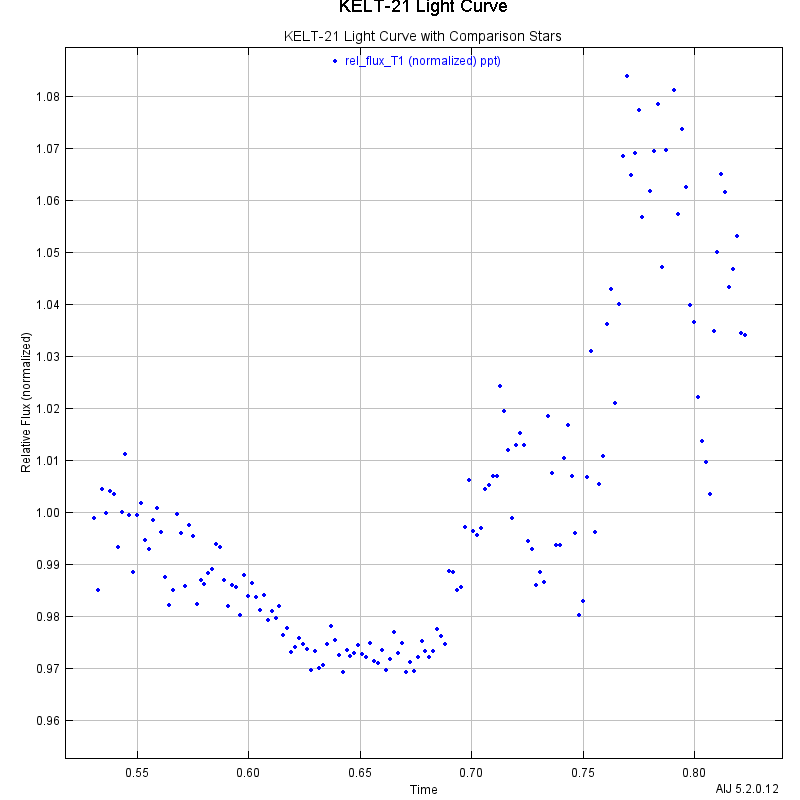

<i class="fa fa-image" style="font-size:1.5em; color:red"></i> 9) Embed a screenshot of your AIJ plot showing the lightcurve of KELT-21 when saturated or non-linear stars have been removed. In the window "Multi-plot Main" you can add a title, subtitle (say "with all comparison stars"), x and y axis label, and you can adjust the x and y scaling to show your target. How does the transit look now? By how much has KELT-21 dimmed by? 

<span style="color:red">(3 pt total)</span> 

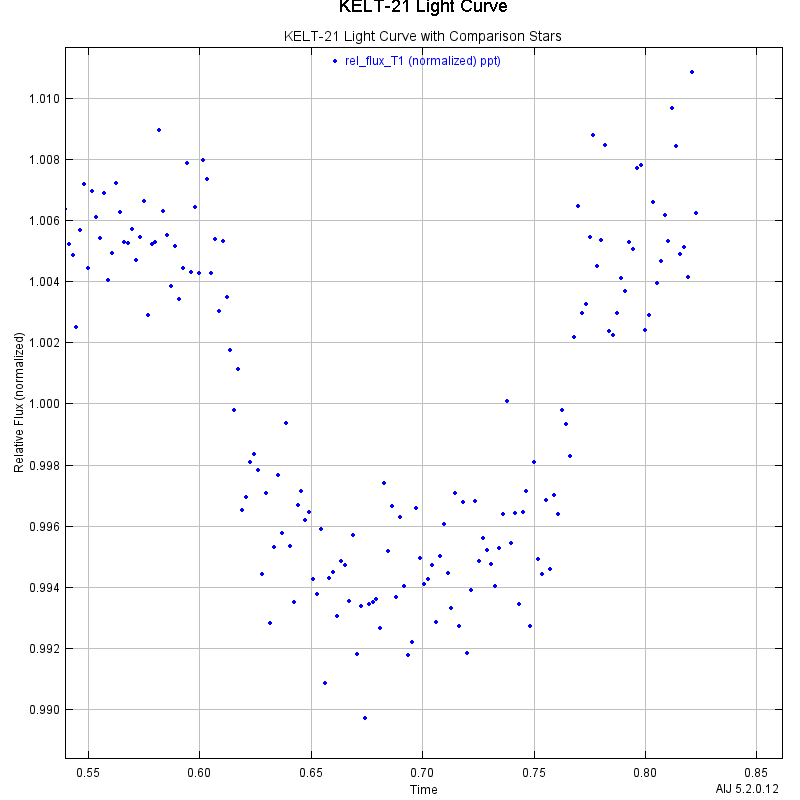

## Back to Python

<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 10) Read in this CSV file and make a nice plot (axis labels with units, title) of the BJD_TDB (x-axis) and rel_flux_T1 (y-axis) columns. Normalize the flux values by dividing it by the median of the entire flux array that is not during the transit. **HINT: use a np.where()** We want the out of transit values to be ~1. This makes it easier to read the plot. Draw a vertical line right on your plot when the transit begins and another line when it ends. Draw a horizontal line at the bottom of the transit. 

<span style="color:red">(8 points total)</span> 

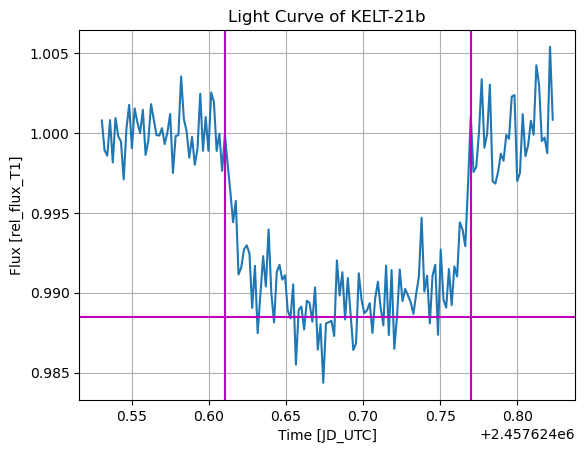

In [75]:
import pandas as pd

#reading in the data
data = pd.read_csv("Measurements_subset.csv")

#reading in the time and flux data
time = data.iloc[:,0]
flux = data.iloc[:,1]

#normalizing the flux
not_transit = data[data['rel_flux_T1']> 0.290]
flux_norm = flux / np.median(not_transit)
np.median(not_transit)

#plotting the data!
plt.plot(time,flux_norm)
plt.grid()
plt.xlabel("Time [JD_UTC]")
plt.ylabel("Flux [rel_flux_T1]")
plt.title("Light Curve of KELT-21b")

#adding the vertical and horizontal lines
plt.axvline(x = 2457624.610417, color = 'm')
plt.axvline(x = 2457624.769838, color = 'm')
plt.axhline(y = 0.9885, color = 'm')


<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i>  11) How much does the planet dim KELT-21 by? If your out of transit base line is ~1.0 and the bottom of the transit was at 0.98, this means 2% of the light was blocked. **This assumes your out of transit baseline is at one.** How long is the transit (in hours) from your plot? Compare your estimates with the values on 
<a href="https://exoplanetarchive.ipac.caltech.edu/"> NASA Exoplanet Archive </a> for KELT-21. ***T$_{14}$ is transit duration. You can calculate the transit depth by (R$_P$/R$_*$)^2**


<span style="color:red">(2 pt total)</span>

<span style="color:dodgerblue"> The transit base line is 1.0 and the bottom of the transit is 0.9885, therefore, 1.15% of the light was blocked. The transit was roughly 4 hours long (converting the Julian times).
    
<span style="color:dodgerblue"> According to the NASA Exoplanet Archive, the transit depth is 0.099520 (1%), and the transit duration is 4.105 hours. These values are very close to the estimates I got above!

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i>  12) How close were your estimates for depth and duration to those listed on the NASA Exoplanet Archive (NEA) for KELT-21 b? Calculate the percent difference for each parameter: (NEA Value - Your Value) / ((NEA Value + Your Value)/2) x 100. Was your estimates for duration and depth reasonable? **Hint for Depth: Compare the scatter in data points you see out of transit to the difference between your values and the ones on NEA**

<span style="color:red">(4 points total)</span>

<span style="color:dodgerblue"> Depth Error: 9.31932% difference
    
<span style="color:dodgerblue"> Duration Error: 2.59099% difference

<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 13) Create a plot of the two comparison lightcurves you extracted (normalize each lightcurve like you did in part #10),, one bad comp star that was removed (plot in red) and one good one that was included (plot in green). Apply a vertical (y) offset so the two light curves are not on top of each other. 

<span style="color:red">(4 pt total)</span>

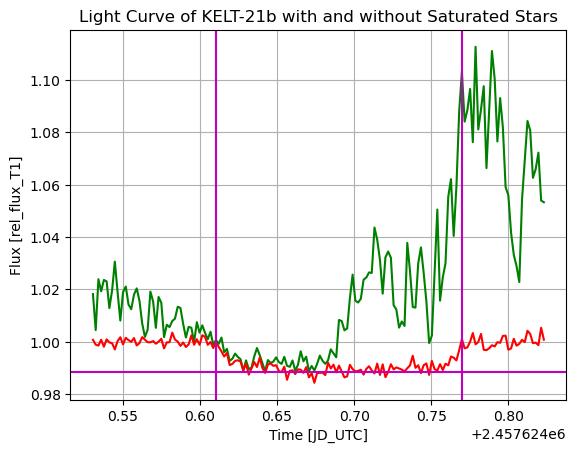

In [87]:
#oversaturated data

#reading in the data
data = pd.read_csv("Measurements_subset._w_oversatdat.csv")

#reading in the time and flux data
time_ov = data.iloc[:,0]
flux_ov = data.iloc[:,1]

#normalizing the flux
flux_norm_ov = flux_ov / 0.109

#plotting the data!
plt.plot(time_ov,flux_norm_ov, label = "With Bad Stars", color = "green")



#reading in the data
data = pd.read_csv("Measurements_subset.csv")

#reading in the time and flux data
time = data.iloc[:,0]
flux = data.iloc[:,1]

#normalizing the flux
not_transit = data[data['rel_flux_T1']> 0.290]
flux_norm = flux / np.median(not_transit)
np.median(not_transit)

#plotting the data!
plt.plot(time,flux_norm, label='Without bad Stars', color = 'red')
plt.xlabel("Time [JD_UTC]")
plt.ylabel("Flux [rel_flux_T1]")
plt.title("Light Curve of KELT-21b with and without Saturated Stars")
plt.grid()

#adding the vertical and horizontal lines
plt.axvline(x = 2457624.610417, color = 'm')
plt.axvline(x = 2457624.769838, color = 'm')
plt.axhline(y = 0.9885, color = 'm')

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i>  14) Describe the differences between the red and green comparison light curves.

<span style="color:red">(2 Points)</span>

<span style="color:dodgerblue"> There are a lot of differences in the red and green comparison light curves. The first noteable difference is the apparent oversaturation of the relative flux towards the last half of the green light curve. There is also no specific pattern to the green curve, while the red curve has a clear transit. It is also very difficult to decide where the transit takes place in the green curve.

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i> 15) Use the terms "noise" and "S/N" to explain why dark nights around new moon are more in demand for observing time than bright nights around full moon.

(<span style="color:red">2 pts total</span>).

<span style="color:dodgerblue"> When you observe astronomical objects, you want to maximize the S/N ratio to get the best possible data. Dark nights around new moon are more in demand for observing time because they provide the best conditions for achieving a high S/N ratio.

<span style="color:dodgerblue"> During the new moon, the sky is the darkest, and there is very little ambient light to interfere with observations. Additionally, the moon is not visible in the sky, so there is no moonlight to cause background noise. This means that any signals you observe will have a much higher S/N ratio, making it easier to detect faint objects and analyze them.

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i> Extra Credit: A public version of the KELT-21b discovery paper is available here: https://arxiv.org/abs/1712.03241. Provide a 2 paragraph review of why this planet is unique and interesting, highlighting key points made in the paper. This should be in your own words and not using language from the paper or abstract. 

<span style="color:dodgerblue"> The KELT-21b discovery paper highlights some key points that make this planet particularly interesting. For example, it was noted that KELT-21b has a mass that is more than twice that of Jupiter, but it orbits its host star in only 3.6 rotational days, which is one of the shortest orbital periods known of this mass. The close proximity to the host star also means that KELT-21b is subject to intense radiation and heating, which causes it to have an incredibly high temperature of around 3000 K. This makes KELT-21b one of the hottest exoplanets that has been discovered to date. 

<span style="color:dodgerblue"> Overall, the discovery of KELT-21b provides valuable insights into the properties and behavior of even hotter Jupiters, and it may help astronomers to better understand how these planets form and evolve. The extreme characteristics of KELT-21b make it an interesting target for future studies, and it has the potential to provide new insights into the physics of planetary atmospheres and the dynamics of early planetary systems.

## <i class="fa fa-exclamation-triangle" style="font-size:1.5em; color:red"></i>Closeout

Prepare this lab for submission: Remove any "tips" and unnecessary instruction text or cells. When you are finished, this notebook document should only include numbered questions you answered, and your answers.

Make sure all cells are rendered, and that this notebook is saved.  After you've saved it, select `File > Close and Halt`. Place this notebook file and all image files in a separate folder.  Follow the instructions on D2L for archiving and uploading your lab report to the dropbox.